## Part I: Building a Basic NN

In [2]:
import numpy as np
import pandas as pd
import torch
from torch import nn
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import time

In [3]:
# Load the CSV file into a DataFrame
df = pd.read_csv('dataset.csv')
df = df.apply(pd.to_numeric, errors='coerce').dropna()

In [4]:
# Print the first 5 rows to verify that the data was loaded correctly
df.head()

,f1,f2,f3,f4,f5,f6,f7,target
0,6.0,148.0,72,35.0,0.0,33.6,0.627,1
1,1.0,85.0,66,29.0,0.0,26.6,0.351,0
2,8.0,183.0,64,0.0,0.0,23.3,0.672,1
3,1.0,89.0,66,23.0,94.0,28.1,0.167,0
4,0.0,137.0,40,35.0,168.0,43.1,2.288,1


In [5]:
# Shuffling the data
df = df.sample(frac=1, random_state=40)
df.describe()

,f1,f2,f3,f4,f5,f6,f7,target
count,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000
mean,3.834211,120.969737,69.119737,20.507895,80.234211,31.998684,0.473250,0.350000
std,3.364762,32.023301,19.446088,15.958029,115.581444,7.899724,0.332277,0.477284
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.300000,0.243750,0.000000
50%,3.000000,117.000000,72.000000,23.000000,36.000000,32.000000,0.375500,0.000000
75%,6.000000,141.000000,80.000000,32.000000,128.250000,36.600000,0.627500,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,1.000000


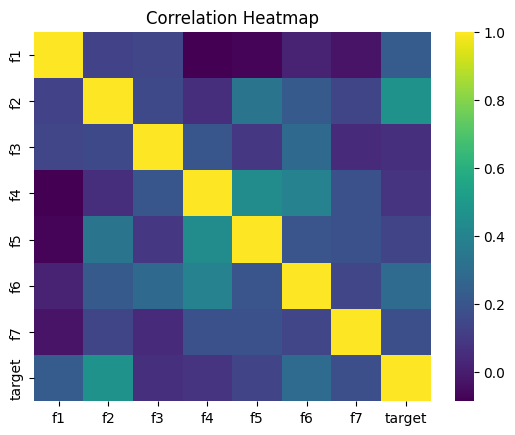

In [6]:
correlation_matrix = df.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, cmap="viridis")
plt.title('Correlation Heatmap')
plt.show()

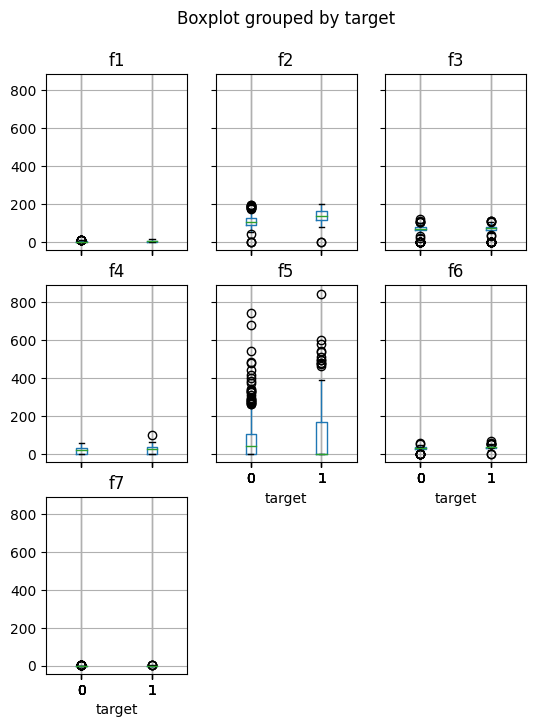

In [7]:
# Plot a box plot to demonstrate the distribution of each feature across each target class
df.boxplot(column=['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7'], by='target', figsize=(6, 8))
plt.show()

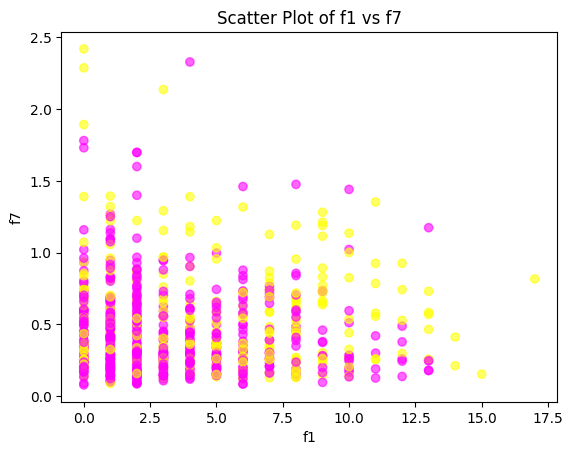

In [8]:
plt.scatter(data=df, x="f1", y="f7", c="target", cmap="spring", alpha=0.6)
plt.title("Scatter Plot of f1 vs f7")
plt.xlabel("f1")
plt.ylabel("f7")
plt.show()

In [9]:
# Scaling the data to avoid bais results
scaler = StandardScaler()
norm_cols = ['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7']
scaler.fit(df[norm_cols])
df[norm_cols] = scaler.transform(df[norm_cols])

df.head()

,f1,f2,f3,f4,f5,f6,f7,target
623,-1.140270,-0.842746,0.045297,0.407092,0.300988,1.456872,-0.380204,0
493,0.049305,0.125937,0.045297,-0.157259,0.361592,-0.392511,2.019977,1
188,1.238879,-0.374028,0.354045,1.159559,0.292331,-0.519181,0.502171,1
716,-0.248089,1.625833,0.456961,1.159559,0.907021,0.228173,1.495973,1
435,-1.140270,0.625902,-3.556770,-1.285961,-0.694636,1.317535,-0.807840,1


In [10]:
# Split the dataset into training and validation sets
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=40, shuffle=True)

# Splittng the training set into training and validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=40, shuffle=True)

# Storing the original training and testing sets
y_train_org = y_train
y_test_org = y_test

X_val_org = X_val
y_val_org = y_val

# Printing the shape of X and y training and testing sets
print("Shape of X_train: %s, y_train: %s"%(X_train.shape, y_train.shape))
print("Shape of y_train: %s, y_test: %s"%(X_test.shape, y_test.shape))
print("Shape of X_val: %s, y_val: %s"%(X_val.shape, y_val.shape))

Shape of X_train: (547, 7), y_train: (547,)
Shape of y_train: (76, 7), y_test: (76,)
Shape of X_val: (137, 7), y_val: (137,)


In [11]:
# Converting the dataset into tensors
X_train = torch.FloatTensor(np.array(X_train))
X_test = torch.FloatTensor(np.array(X_test))
y_train = torch.FloatTensor(np.array(y_train))
y_test = torch.FloatTensor(np.array(y_test))
X_val = torch.FloatTensor(np.array(X_val))
y_val = torch.FloatTensor(np.array(y_val))

In [12]:
# Define the neural network class
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.fc4 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.sigmoid(self.fc4(x))
        return x

In [13]:
# Define the hyperparameters
input_size = X.shape[1]
hidden_size = 128
output_size = 1
learning_rate = 0.0001
epochs = 400
batch_size = 32

# Initializing the neural network
model = NeuralNetwork(input_size, hidden_size, output_size)

# Defining the loss function and the optimizer
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), learning_rate)

losses = []
train_loss = []
test_loss = []
train_accuracy = []
test_accuracy = []

# Define the predict and accuracy functions
def predict(X):
    with torch.no_grad():
        y_pred = (model(X) > 0.5).float()
    true_pred = []
    true_pred = [1 if i == 1 else 0 for i in y_pred]
    return true_pred

def accuracy(X, y):
    return (predict(X) == y).sum()/y.shape[0]*100

# Traning the NN
for epoch in range(epochs):
    for i in range(0, X_train.shape[0], batch_size):
        X_batch = X_train[i: i + batch_size]
        y_batch = y_train[i: i + batch_size]
         
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch.float().reshape(-1, 1))
         
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
         
    if epoch % 50 == 0:
        losses.append(loss.item())
        print("epoch {}\tloss : {}".format(epoch,loss))
    
    train_loss.append(loss.detach().numpy())
    train_accuracy.append(accuracy(X_train, y_train_org))
    test_accuracy.append(accuracy(X_test, y_test_org))
    test_loss.append(criterion(model(X_test), y_test.float().reshape(-1, 1)).detach().numpy())
    
torch.save(model, 'sejaldee_lokeshsu_assignment2_part1.h5')

epoch 0	loss : 0.5534575581550598
epoch 50	loss : 0.38800129294395447
epoch 100	loss : 0.3560132086277008
epoch 150	loss : 0.3555724322795868
epoch 200	loss : 0.35656633973121643
epoch 250	loss : 0.3572538197040558
epoch 300	loss : 0.3574032783508301
epoch 350	loss : 0.357356995344162


In [14]:
print("Training Accuracy: ", accuracy(X_train, y_train_org), "%")
print("Testing Accuracy: ", accuracy(X_test, y_test_org), "%")

Training Accuracy:  78.24497257769653 %
Testing Accuracy:  81.57894736842105 %


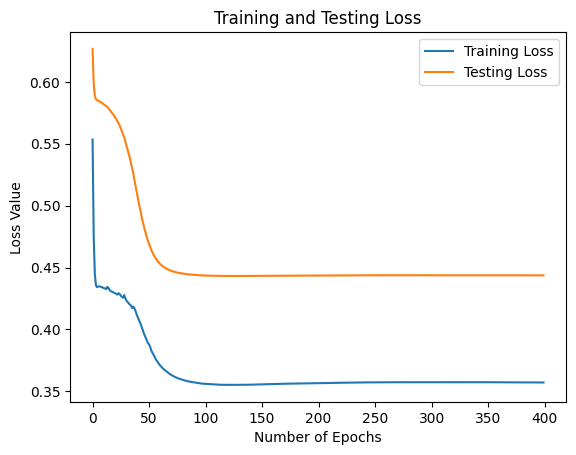

In [15]:
# Plot your training and testing losses
plt.plot(train_loss, label='Training Loss')
plt.plot(test_loss, label='Testing Loss')
plt.title("Training and Testing Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss Value")
plt.legend()
plt.show()

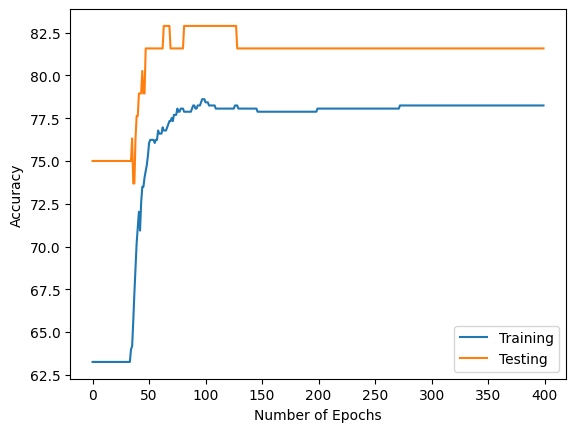

In [16]:
# Plot your training and testing accuracy
plt.plot(train_accuracy, label='Training')
plt.plot(test_accuracy, label='Testing')
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

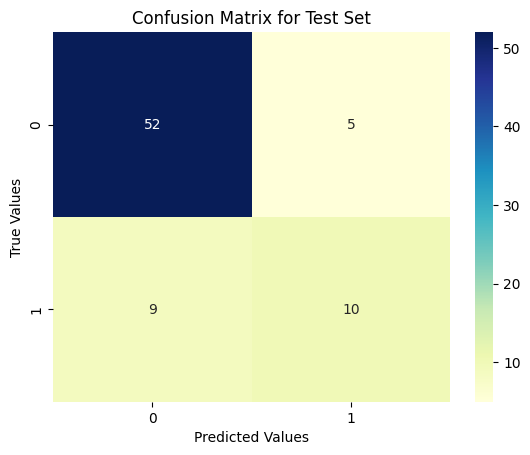

In [17]:
true_pred = predict(X_test)
conf_matx = confusion_matrix(y_test_org, true_pred)

sns.heatmap(conf_matx, annot=True, cmap='YlGnBu')
plt.title('Confusion Matrix for Test Set')
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

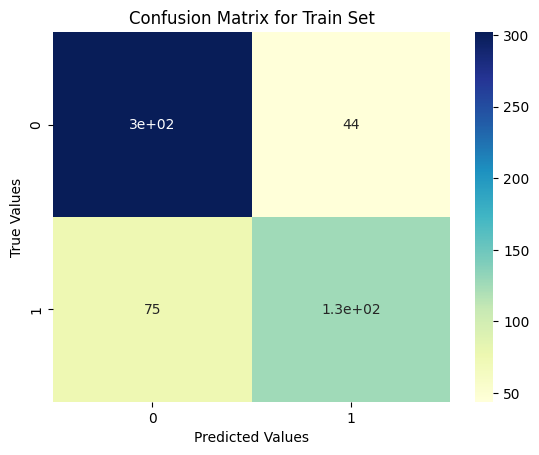

In [18]:
true_pred = predict(X_train)
conf_matx = confusion_matrix(y_train_org, true_pred)

sns.heatmap(conf_matx, annot=True, cmap='YlGnBu')
plt.title('Confusion Matrix for Train Set')
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

## Part II: Optimizing NN

##### Setup 1: Neural Network with dropout = 0.2, Activation Function = Sigmoid and Optimizer = Adamax

In [19]:
# Define the neural network class
class NeuralNetwork_Sigmoid(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, dropout):
        super(NeuralNetwork_Sigmoid, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.fc4 = nn.Linear(hidden_size, output_size)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        x = torch.tanh(self.fc1(x))
        x = self.dropout(x)
        x = torch.tanh(self.fc2(x))
        x = self.dropout(x)
        x = torch.tanh(self.fc3(x))
        x = self.dropout(x)
        x = torch.sigmoid(self.fc4(x))
        return x

In [20]:
# Define the hyperparameters
input_size = X.shape[1]
hidden_size = 128
output_size = 1
learning_rate = 0.0001
epochs = 400
batch_size = 32
dropout = 0.20

# Define the predict and accuracy functions
def predict(X):
    with torch.no_grad():
        y_pred = (base_model(X) > 0.5).float()
    true_pred = []
    true_pred = [1 if i == 1 else 0 for i in y_pred]
    return true_pred

def accuracy(X, y):
    return (predict(X) == y).sum()/y.shape[0]*100

# Defining the loss function and the optimizer
criterion = nn.BCELoss()

# Training the NN
start_time = time.time()

# Initializing the neural network
base_model = NeuralNetwork_Sigmoid(input_size, hidden_size, output_size, dropout)
optimizer = torch.optim.Adamax(base_model.parameters(), learning_rate)

train_loss_setup1 = []
val_loss_setup1 = []
test_loss_s1 = []
train_accuracy_s1 = []
val_accuracy_s1 = []
test_accuracy_s1 = []

for epoch in range(epochs):
    for i in range(0, X_train.shape[0], batch_size):
        X_batch = X_train[i: i + batch_size]
        y_batch = y_train[i: i + batch_size]

        outputs = base_model(X_batch)
        loss = criterion(outputs, y_batch.float().reshape(-1, 1))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    if epoch % 50 == 0:
        losses.append(loss.item())
        print("epoch {}\tloss : {}".format(epoch,loss))

    train_loss_setup1.append(loss.detach().numpy())
    train_accuracy_s1.append(accuracy(X_train, y_train_org))
    val_accuracy_s1.append(accuracy(X_val, y_val_org))
    val_loss_setup1.append(criterion(base_model(X_val), y_val.float().reshape(-1, 1)).detach().numpy())
    
    test_accuracy_s1.append(accuracy(X_test, y_test_org))
    test_loss_s1.append(criterion(base_model(X_test), y_test.float().reshape(-1, 1)).detach().numpy())
    
train_accuracy_setup1 = accuracy(X_train, y_train_org)
val_accuracy_setup1 = accuracy(X_val, y_val_org)
test_accuracy_setup1 = accuracy(X_test, y_test_org)

train_time_base = time.time() - start_time 

print("\nTraining Time: {:.2f} Seconds".format(train_time_base))
print("\nTraining Accuracy: {:.2f}%".format(train_accuracy_setup1))
print("Validation Accuracy: {:.2f}%".format(val_accuracy_setup1))
print("Test Accuracy: {:.2f}%".format(test_accuracy_setup1))

epoch 0	loss : 0.6459300518035889
epoch 50	loss : 0.367885023355484
epoch 100	loss : 0.24433910846710205
epoch 150	loss : 0.32205072045326233
epoch 200	loss : 0.26380300521850586
epoch 250	loss : 0.30827274918556213
epoch 300	loss : 0.2660614252090454
epoch 350	loss : 0.2542499899864197

Training Time: 6.77 Seconds

Training Accuracy: 77.70%
Validation Accuracy: 75.18%
Test Accuracy: 80.26%


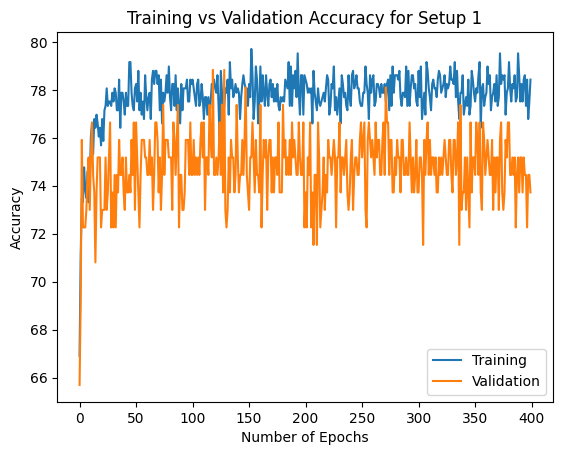

In [21]:
# Plot your training and validation accuracy
plt.plot(train_accuracy_s1, label='Training')
plt.plot(val_accuracy_s1, label='Validation')
plt.title("Training vs Validation Accuracy for Setup 1")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

##### Setup 2: Neural Network with dropout = 0.3, Activation Function = Leaky Relu and Optimizer = SGD

In [22]:
# Define the neural network class
class NeuralNetwork_SGD(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, dropout):
        super(NeuralNetwork_SGD, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.fc4 = nn.Linear(hidden_size, output_size)
        self.dropout = nn.Dropout(dropout)
        self.leaky_relu = nn.LeakyReLU()

    def forward(self, x):
        x = self.leaky_relu(self.fc1(x))
        x = self.dropout(x)
        x = self.leaky_relu(self.fc2(x))
        x = self.dropout(x)
        x = self.leaky_relu(self.fc3(x))
        x = self.dropout(x)
        x = torch.sigmoid(self.fc4(x))
        return x

In [23]:
# Define the hyperparameters
input_size = X.shape[1]
hidden_size = 128
output_size = 1
learning_rate = 0.0001
epochs = 400
batch_size = 32
dropout = 0.3

# Defining the loss function and the optimizer
criterion = nn.BCELoss()

# Define the predict and accuracy functions
def predict(X):
    with torch.no_grad():
        y_pred = (base_model(X) > 0.5).float()
    true_pred = []
    true_pred = [1 if i == 1 else 0 for i in y_pred]
    return true_pred

def accuracy(X, y):
    return (predict(X) == y).sum()/y.shape[0]*100

# Training the NN
    
# Initializing the neural network
model_setup2 = NeuralNetwork_SGD(input_size, hidden_size, output_size, dropout)
optimizer = torch.optim.SGD(model_setup2.parameters(), learning_rate)

train_loss_s2 = []
val_loss_s2 = []
train_accuracy_s2 = []
val_accuracy_s2 = []

for epoch in range(epochs):
    for i in range(0, X_train.shape[0], batch_size):
        X_batch = X_train[i: i + batch_size]
        y_batch = y_train[i: i + batch_size]

        outputs = model_setup2(X_batch)
        loss = criterion(outputs, y_batch.float().reshape(-1, 1))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    if epoch % 50 == 0:
        losses.append(loss.item())
        print("epoch {}\tloss : {}".format(epoch,loss))

    train_loss_s2.append(loss.detach().numpy())
    train_accuracy_s2.append(accuracy(X_train, y_train_org))
    val_accuracy_s2.append(accuracy(X_val, y_val_org))
    val_loss_s2.append(criterion(model_setup2(X_val), y_val.float().reshape(-1, 1)).detach().numpy())
    
print("\nTraining Accuracy: {:.2f} %".format(accuracy(X_train, y_train_org)))
print("Validation Accuracy: {:.2f} %".format(accuracy(X_val, y_val_org)))

epoch 0	loss : 0.6517465114593506
epoch 50	loss : 0.6533017754554749
epoch 100	loss : 0.6319647431373596
epoch 150	loss : 0.6327713131904602
epoch 200	loss : 0.6115344762802124
epoch 250	loss : 0.6274630427360535
epoch 300	loss : 0.6142955422401428
epoch 350	loss : 0.5781375169754028

Training Accuracy: 78.43 %
Validation Accuracy: 73.72 %


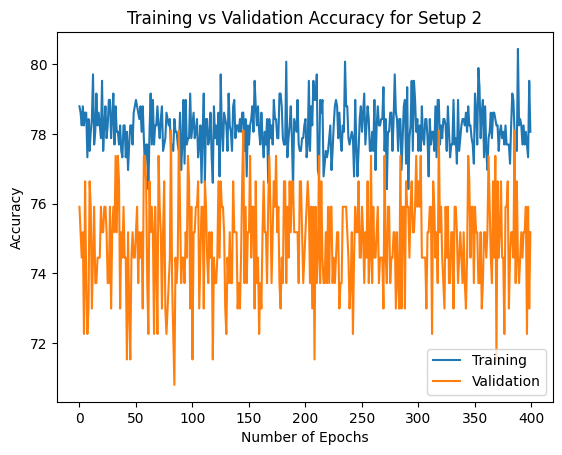

In [24]:
# Plot your training and validation accuracy
plt.plot(train_accuracy_s2, label='Training')
plt.plot(val_accuracy_s2, label='Validation')
plt.title("Training vs Validation Accuracy for Setup 2")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

##### Setup 3: Neural Network with dropout = 0.5, Activation Function = tanh and Optimizer = Adam

In [25]:
# Define the neural network class
class NeuralNetwork_tanh(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, dropout):
        super(NeuralNetwork_tanh, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.fc4 = nn.Linear(hidden_size, output_size)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        x = torch.tanh(self.fc1(x))
        x = self.dropout(x)
        x = torch.tanh(self.fc2(x))
        x = self.dropout(x)
        x = torch.tanh(self.fc3(x))
        x = self.dropout(x)
        x = torch.sigmoid(self.fc4(x))
        return x

In [26]:
# Define the hyperparameters
input_size = X.shape[1]
hidden_size = 128
output_size = 1
learning_rate = 0.0001
epochs = 400
batch_size = 32
dropout = 0.5

# Defining the loss function and the optimizer
criterion = nn.BCELoss()

# Define the predict and accuracy functions
def predict(X):
    with torch.no_grad():
        y_pred = (model_setup3(X) > 0.5).float()
    true_pred = []
    true_pred = [1 if i == 1 else 0 for i in y_pred]
    return true_pred

def accuracy(X, y):
    return (predict(X) == y).sum()/y.shape[0]*100

# Training the NN
    
# Initializing the neural network
model_setup3 = NeuralNetwork_tanh(input_size, hidden_size, output_size, dropout)
optimizer = torch.optim.NAdam(model_setup3.parameters(), learning_rate)

train_loss_s3 = []
val_loss_s3 = []
train_accuracy_s3 = []
val_accuracy_s3 = []

for epoch in range(epochs):
    for i in range(0, X_train.shape[0], batch_size):
        X_batch = X_train[i: i + batch_size]
        y_batch = y_train[i: i + batch_size]

        outputs = model_setup3(X_batch)
        loss = criterion(outputs, y_batch.float().reshape(-1, 1))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    if epoch % 50 == 0:
        losses.append(loss.item())
        print("epoch {}\tloss : {}".format(epoch,loss))

    train_loss_s3.append(loss.detach().numpy())
    train_accuracy_s3.append(accuracy(X_train, y_train_org))
    val_accuracy_s3.append(accuracy(X_val, y_val_org))
    val_loss_s3.append(criterion(model_setup3(X_val), y_val.float().reshape(-1, 1)).detach().numpy())
    
print("\nTraining Accuracy: {:.2f} %".format(accuracy(X_train, y_train_org)))
print("Validation Accuracy: {:.2f} %".format(accuracy(X_val, y_val_org)))

epoch 0	loss : 0.6606433391571045
epoch 50	loss : 0.34042325615882874
epoch 100	loss : 0.40023744106292725
epoch 150	loss : 0.23486821353435516
epoch 200	loss : 0.33017274737358093
epoch 250	loss : 0.3455471098423004
epoch 300	loss : 0.36062511801719666
epoch 350	loss : 0.19645042717456818

Training Accuracy: 77.88 %
Validation Accuracy: 75.91 %


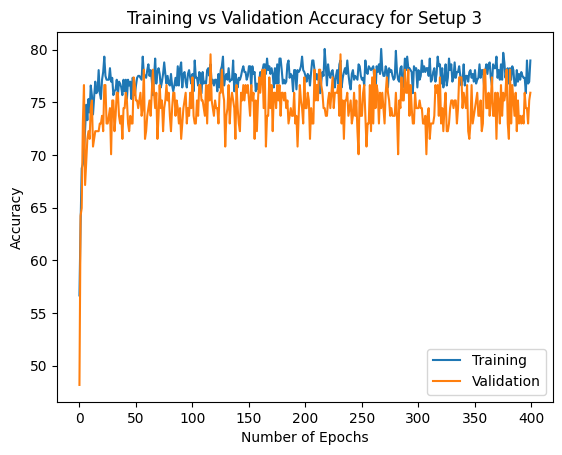

In [27]:
# Plot your training and validation accuracy
plt.plot(train_accuracy_s3, label='Training')
plt.plot(val_accuracy_s3, label='Validation')
plt.title("Training vs Validation Accuracy for Setup 3")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Results after performing step 1 and 2:

Dropout Tuning
| Hyperparameters | Setup 1 | Test Accuracy | Setup 2 | Test Accuracy | Setup 3 | Test Accuracy |
| :-----------------: | :-----: | :---: | :-----: | :----: | :-----:   | :----: |
| Dropout             | 0.2     | 73.68%| 0.3     | 71.97% | 0.5       | 70.31% |
| Optimizer           | Adam    |       | Adam    |        | SGD       |
| Activation Function | relu    |       | Sigmoid |        | LeakyRelu |

Optimizer Tuning
| Hyperparameters | Setup 1 | Test Accuracy | Setup 2 | Test Accuracy | Setup 3 | Test Accuracy |
| :-----------------: | :-----: | :---: | :-----: | :----: | :-----: | :----: |
| Dropout             | 0.2     |       | 0.3     |        | 0.5     |
| Optimizer           | Adamax    | 73.68%| SGD     | 65.13% | SGD     | 71.30% |
| Activation Function | relu    |       | Sigmoid |        | tanh    |

Activation Function Tuning
| Hyperparameters | Setup 1 | Test Accuracy | Setup 2 | Test Accuracy | Setup 3 | Test Accuracy |
| :-----------------: | :-----: | :---: | :-----: | :----: | :-----: | :----: |
| Dropout             | 0.2     |       | 0.3       |        | 0.5     |
| Optimizer           | Adamax    |       | SGD       |        | Nadam    |
| Activation Function | tanh    | 76.23%| LeakyRelu | 65.78% | tanh    | 75.26%|

Base Model: Dropout: 0.2, Optimizer: Adamax, Activation Function: tanh

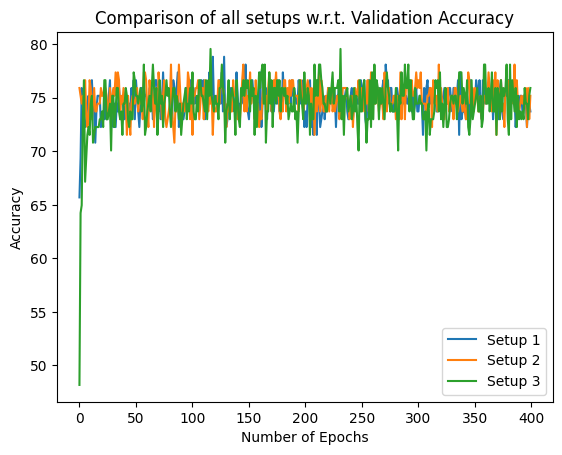

In [28]:
# Plotting the graph for validation accuracy for all setups
plt.plot(val_accuracy_s1, label = "Setup 1")
plt.plot(val_accuracy_s2, label = "Setup 2")
plt.plot(val_accuracy_s3, label = "Setup 3")
plt.title("Comparison of all setups w.r.t. Validation Accuracy")
plt.legend()
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.show()

#### Step 3: Implementing early stopping

In [29]:
# Define the hyperparameters
input_size = X.shape[1]
hidden_size = 128
output_size = 1
learning_rate = 0.0001
epochs = 400
batch_size = 32
dropout = 0.2

# Setting up early stopping
best_val_loss = float('inf')
early_stopping_counter = 0
tol = 10

# Defining the loss function and the optimizer
criterion = nn.BCELoss()

# Define the predict and accuracy functions
def predict(X):
    with torch.no_grad():
        y_pred = (model_earlystop(X) > 0.5).float()
    true_pred = []
    true_pred = [1 if i == 1 else 0 for i in y_pred]
    return true_pred

def accuracy(X, y):
    return (predict(X) == y).sum()/y.shape[0]*100

# Training the NN
start_time = time.time()

# Initializing the neural network
model_earlystop = NeuralNetwork_Sigmoid(input_size, hidden_size, output_size, dropout)
optimizer = torch.optim.Adamax(model_earlystop.parameters(), learning_rate)

# Initializing the metrics
train_loss_earlystop = []
val_loss_earlystop = []
train_accuracy_early = []
val_accuracy_early = []
test_accuracy_early = []

for epoch in range(epochs):
    for i in range(0, X_train.shape[0], batch_size):
        X_batch = X_train[i: i + batch_size]
        y_batch = y_train[i: i + batch_size]

        outputs = model_earlystop(X_batch)
        loss = criterion(outputs, y_batch.float().reshape(-1, 1))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    train_loss_earlystop.append(loss.detach().numpy())
    train_accuracy_early.append(accuracy(X_train, y_train_org))
    test_accuracy_early.append(accuracy(X_test, y_test_org))

    # Computing validation loss and accuracy
    with torch.no_grad():
        val_outputs = model_earlystop(X_val)
        val_loss_earlystop.append(criterion(val_outputs, y_val.float().reshape(-1, 1)).detach().numpy())
        val_accuracy_early.append(accuracy(X_val, y_val_org))

    # We will check to see if we need to early stop
    if val_loss_earlystop[-1] < best_val_loss:
        best_loss = val_loss_earlystop[-1]
        early_stopping_counter = 0
    else:
        early_stopping_counter += 1
        if early_stopping_counter >= tol:
            print(f'Early stopping after epoch {epoch}. Best Validation loss: {best_loss}')
            break
        
    if epoch % 50 == 0:
        losses.append(loss.item())
        print("epoch {}\tloss : {}".format(epoch,loss))


test_accuracy_earlystop = accuracy(X_test, y_test_org)

train_time_earlystop = time.time() - start_time

print("\nTraining Time: {:.2f} seconds".format(train_time_earlystop))
print("\nTraining Accuracy: {:.2f} %".format(train_accuracy_early[-1]))
print("Validation Accuracy: {:.2f} %".format(val_accuracy_early[-1]))
print("Testing Accuracy: {:.2f} %".format(test_accuracy_earlystop))

epoch 0	loss : 0.6092200875282288
epoch 50	loss : 0.4507873058319092
epoch 100	loss : 0.41688814759254456
epoch 150	loss : 0.39395251870155334
epoch 200	loss : 0.35375797748565674
epoch 250	loss : 0.35419583320617676
epoch 300	loss : 0.34843242168426514
epoch 350	loss : 0.4002138674259186

Training Time: 6.70 seconds

Training Accuracy: 78.61 %
Validation Accuracy: 73.72 %
Testing Accuracy: 80.26 %


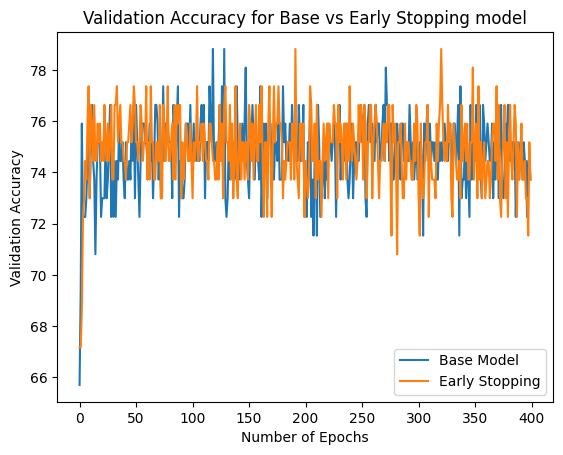

In [30]:
# Plotting the graph for validation accuracy for a base and an improved model
plt.plot(val_accuracy_s1, label='Base Model')
plt.plot(val_accuracy_early, label='Early Stopping')
plt.title("Validation Accuracy for Base vs Early Stopping model")
plt.xlabel("Number of Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()

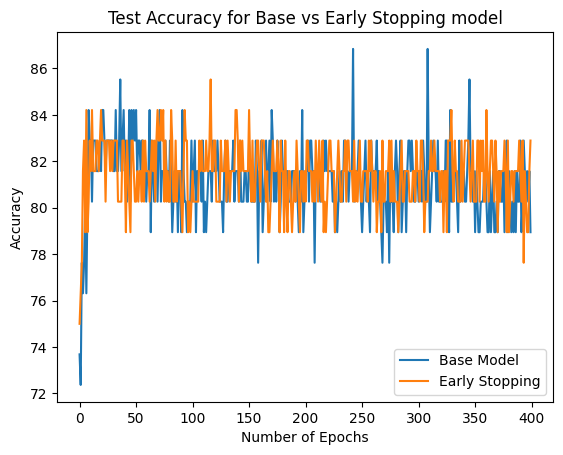

In [31]:
# Plotting the graph for test accuracy for a base and an improved model
plt.plot(test_accuracy_s1, label='Base Model')
plt.plot(test_accuracy_early, label='Early Stopping')
plt.title("Test Accuracy for Base vs Early Stopping model")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

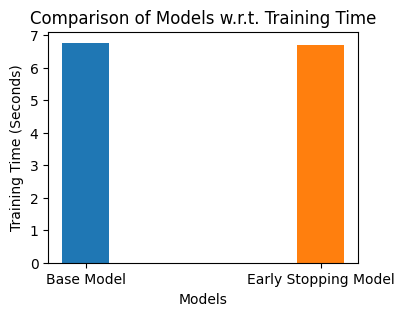

In [32]:
# Plotting the graph w.r.t. Training Time
fig = plt.figure(figsize = (4, 3))
plt.bar(['Base Model', 'Early Stopping Model'], [train_time_base, train_time_earlystop], color=['tab:blue', 'tab:orange'], width=0.2)
plt.xlabel('Models')
plt.ylabel('Training Time (Seconds)')
plt.title('Comparison of Models w.r.t. Training Time')
plt.show()

#### Step 3: Implementing K-Fold

In [33]:
# Define the hyperparameters
input_size = X.shape[1]
hidden_size = 128
output_size = 1
learning_rate = 0.0001
epochs = 400
batch_size = 32
dropout = 0.2

# Defining the loss function and the optimizer
criterion = nn.BCELoss()

# Define the predict and accuracy functions
def predict(X):
    with torch.no_grad():
        y_pred = (model_kfold(X) > 0.5).float()
    true_pred = []
    true_pred = [1 if i == 1 else 0 for i in y_pred]
    return true_pred

def accuracy(X, y):
    return (predict(X) == y).sum()/y.shape[0]*100

# Training the NN
start_time = time.time()

# Initializing the neural network
model_kfold = NeuralNetwork_Sigmoid(input_size, hidden_size, output_size, dropout)
optimizer = torch.optim.Adamax(model_kfold.parameters(), learning_rate)

train_loss_kfold = []
val_loss_kfold = []
test_loss_kfold = []
train_accuracy_kf = []
val_accuracy_kf = []
test_accuracy_kf = []

# Splitting the train and test data into K-folds
kf = KFold(n_splits=3, shuffle=True, random_state=40)

for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    
    # Splitting the train set into train and validation set for every fold
    X_train_kf, X_val_kf, y_train_kf, y_val_kf = train_test_split(X_train_fold, y_train_fold, test_size=0.2, random_state=42)
    
    # Storing the original data
    y_val_fold_org = y_val_kf.values
    y_train_org_kf = y_train_kf.values
    y_test_org_kf = y_test_fold.values
    
    # Converting the train and test data into PyTorch tensors
    X_train_fold = torch.FloatTensor(X_train_kf.values)
    X_val_fold = torch.FloatTensor(X_val_kf.values)
    X_test_fold = torch.FloatTensor(X_test_fold.values)
    y_train_fold = torch.FloatTensor(y_train_kf.values)
    y_val_fold = torch.FloatTensor(y_val_kf.values)
    y_test_fold = torch.FloatTensor(y_test_fold.values)
    
    for epoch in range(epochs):
        for i in range(0, X_train_fold.shape[0], batch_size):
            X_batch = X_train_fold[i: i + batch_size]
            y_batch = y_train_fold[i: i + batch_size]

            outputs = model_kfold(X_batch)
            loss = criterion(outputs, y_batch.float().reshape(-1, 1))

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        
        if epoch % 100 == 0:
            print("Fold: {}, epoch: {}, loss: {:.4f}".format(fold+1, epoch, loss))

        train_loss_kfold.append(loss.detach().numpy())
        train_accuracy_kf.append(accuracy(X_train_fold, y_train_org_kf))
        val_accuracy_kf.append(accuracy(X_val_fold, y_val_fold_org))
        val_loss_kfold.append(criterion(model_kfold(X_val_fold), y_val_fold.float().reshape(-1, 1)).detach().numpy())
        
    test_accuracy_kf.append(accuracy(X_test_fold, y_test_org_kf))
    test_loss_kfold.append(criterion(model_kfold(X_test_fold), y_test_fold.float().reshape(-1, 1)).detach().numpy())
    
train_time_kfold = time.time() - start_time

train_accuracy_kfold = np.mean(train_accuracy_kf)
val_accuracy_kfold = np.mean(val_accuracy_kf)
test_accuracy_kfold = np.mean(test_accuracy_kf)

print("\nTraining Time: {:.2f} seconds".format(train_time_kfold))
print("\nTraining Accuracy: {:.2f} %".format(train_accuracy_kfold))
print("Validation Accuracy: {:.2f} %".format(val_accuracy_kfold))
print("Testing Accuracy: {:.2f} %".format(test_accuracy_kfold))

Fold: 1, epoch: 0, loss: 0.7227
Fold: 1, epoch: 100, loss: 0.5559
Fold: 1, epoch: 200, loss: 0.5439
Fold: 1, epoch: 300, loss: 0.4874
Fold: 2, epoch: 0, loss: 0.4525
Fold: 2, epoch: 100, loss: 0.4134
Fold: 2, epoch: 200, loss: 0.4469
Fold: 2, epoch: 300, loss: 0.4061
Fold: 3, epoch: 0, loss: 0.3151
Fold: 3, epoch: 100, loss: 0.2948
Fold: 3, epoch: 200, loss: 0.2918
Fold: 3, epoch: 300, loss: 0.2997

Training Time: 14.11 seconds

Training Accuracy: 78.49 %
Validation Accuracy: 75.67 %
Testing Accuracy: 77.89 %


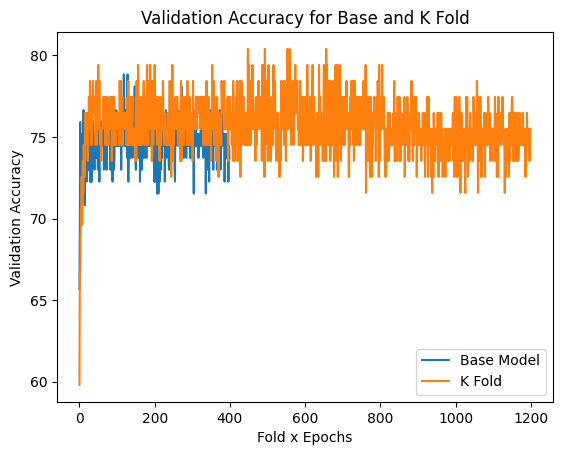

In [34]:
# Plotting the graph for test accuracy for a base and an improved model
plt.plot(val_accuracy_s1, label='Base Model')
plt.plot(val_accuracy_kf, label='K Fold')
plt.title("Validation Accuracy for Base and K Fold")
plt.xlabel("Fold x Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()

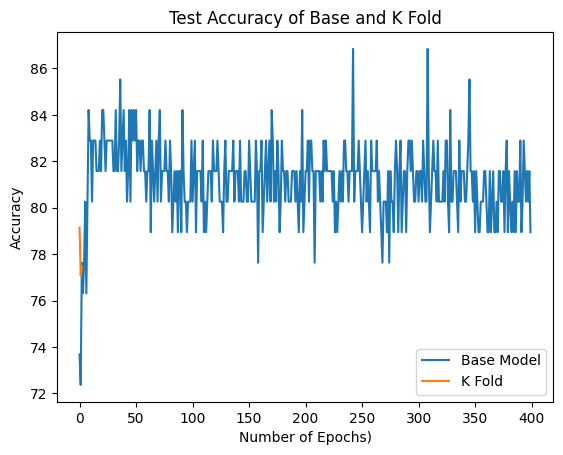

In [35]:
# Plotting the graph for test accuracy for a base and an improved model
plt.plot(test_accuracy_s1, label='Base Model')
plt.plot(test_accuracy_kf, label='K Fold')
plt.title("Test Accuracy of Base and K Fold")
plt.xlabel("Number of Epochs)")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

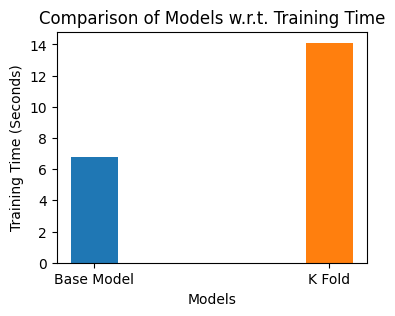

In [36]:
# Plotting the graph w.r.t. Training Time
fig = plt.figure(figsize = (4, 3))
plt.bar(['Base Model', 'K Fold'], [train_time_base, train_time_kfold], color=['tab:blue', 'tab:orange'], width=0.2)
plt.xlabel('Models')
plt.ylabel('Training Time (Seconds)')
plt.title('Comparison of Models w.r.t. Training Time')
plt.show()

#### Step 3: Implementing Learning Rate Scheduler

In [37]:
# Define the hyperparameters
input_size = X.shape[1]
hidden_size = 128
output_size = 1
learning_rate = 0.0001
epochs = 400
batch_size = 32
dropout = 0.2

# Defining the loss function and the optimizer
criterion = nn.BCELoss()

# Define the predict and accuracy functions
def predict(X):
    with torch.no_grad():
        y_pred = (model_lsch(X) > 0.5).float()
    true_pred = []
    true_pred = [1 if i == 1 else 0 for i in y_pred]
    return true_pred

def accuracy(X, y):
    return (predict(X) == y).sum()/y.shape[0]*100

# Training the NN
start_time = time.time()

# Initializing the neural network
model_lsch = NeuralNetwork_Sigmoid(input_size, hidden_size, output_size, dropout)
optimizer = torch.optim.Adamax(model_lsch.parameters(), learning_rate)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, factor=0.1, patience=5)

train_loss_lsch = []
val_loss_lsch = []
test_loss_lsch = []
train_accuracy_ls = []
test_accuracy_ls = []
val_accuracy_ls = []

for epoch in range(epochs):
    for i in range(0, X_train.shape[0], batch_size):
        X_batch = X_train[i: i + batch_size]
        y_batch = y_train[i: i + batch_size]

        outputs = model_lsch(X_batch)
        loss = criterion(outputs, y_batch.float().reshape(-1, 1))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    if epoch % 50 == 0:
        losses.append(loss.item())
        print("epoch {}\tloss : {}".format(epoch,loss))
        
    
    # Computing the train, validation and test loss and accuracy 
    train_loss_lsch.append(loss.detach().numpy())
    # train_accuracy_ls.append(accuracy(X_train, y_train_org))
    
    val_accuracy_ls.append(accuracy(X_val, y_val_org))
    val_loss_lsch.append(criterion(model_lsch(X_val), y_val.float().reshape(-1, 1)).detach().numpy())
    
    test_accuracy_ls.append(accuracy(X_test, y_test_org))    
    test_loss_lsch.append(criterion(model_lsch(X_test), y_test.float().reshape(-1, 1)).detach().numpy())
    
    scheduler.step(val_loss_lsch[-1])
    
train_accuracy_lsch = accuracy(X_train, y_train_org)
val_accuracy_lsch = accuracy(X_val, y_val_org)
test_accuracy_lsch = accuracy(X_test, y_test_org)

train_time_lsch = time.time() - start_time

print("\nTraining Time: {:.2f} seconds".format(train_time_lsch))

print("\nTraining Accuracy: {:.2f} %".format(train_accuracy_lsch))
print("Validation Accuracy: {:.2f} %".format(val_accuracy_lsch))
print("Testing Accuracy: {:.2f} %".format(test_accuracy_lsch))

epoch 0	loss : 0.5791085362434387
epoch 50	loss : 0.33254364132881165
epoch 100	loss : 0.39030566811561584
epoch 150	loss : 0.33538341522216797
epoch 200	loss : 0.43155279755592346
epoch 250	loss : 0.39277562499046326
epoch 300	loss : 0.4729236662387848
epoch 350	loss : 0.3426838219165802

Training Time: 5.40 seconds

Training Accuracy: 77.88 %
Validation Accuracy: 75.18 %
Testing Accuracy: 80.26 %


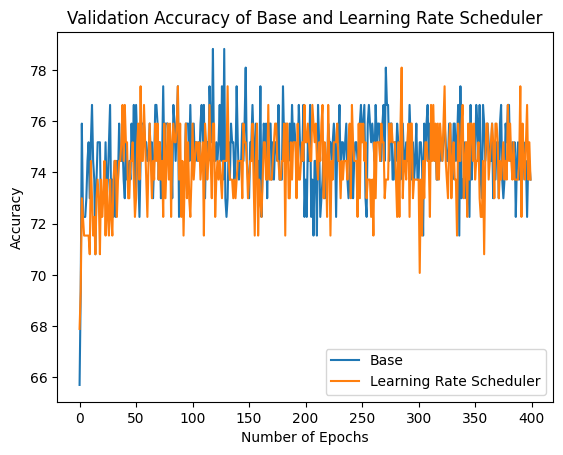

In [38]:
# Plotting the graph for validation accuracy for a base and an improved model
plt.plot(val_accuracy_s1, label='Base')
plt.plot(val_accuracy_ls, label='Learning Rate Scheduler')
plt.title('Validation Accuracy of Base and Learning Rate Scheduler')
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

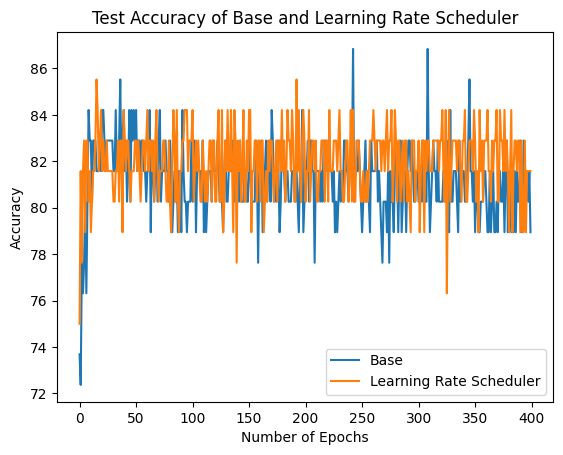

In [39]:
# Plotting the graph for test accuracy for a base and an improved model
plt.plot(test_accuracy_s1, label='Base')
plt.plot(test_accuracy_ls, label='Learning Rate Scheduler')
plt.title('Test Accuracy of Base and Learning Rate Scheduler')
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

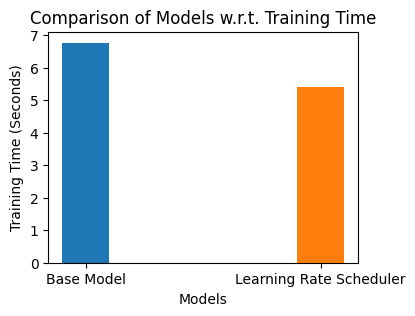

In [40]:
# Plotting the graph w.r.t. Training Time
fig = plt.figure(figsize = (4, 3))
plt.bar(['Base Model', 'Learning Rate Scheduler'], [train_time_base, train_time_lsch], color=['tab:blue', 'tab:orange'], width=0.2)
plt.xlabel('Models')
plt.ylabel('Training Time (Seconds)')
plt.title('Comparison of Models w.r.t. Training Time')
plt.show()

#### Step 3: Implementing Batch Normalization

In [41]:
# Define the neural network class with batch normalization
class NeuralNetwork_batchnorm(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, dropout):
        super(NeuralNetwork_batchnorm, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.bn1 = nn.BatchNorm1d(hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.bn2 = nn.BatchNorm1d(hidden_size)
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.bn3 = nn.BatchNorm1d(hidden_size)
        self.fc4 = nn.Linear(hidden_size, output_size)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        x = torch.tanh(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = torch.relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        x = torch.relu(self.bn3(self.fc3(x)))
        x = self.dropout(x)
        x = torch.sigmoid(self.fc4(x))
        return x

In [42]:
# Define the hyperparameters
input_size = X.shape[1]
hidden_size = 128
output_size = 1
learning_rate = 0.0001
epochs = 400
batch_size = 32
dropout = 0.2

# Defining the loss function and the optimizer
criterion = nn.BCELoss()

# Define the predict and accuracy functions
def predict(X):
    with torch.no_grad():
        y_pred = (model_batchnorm(X) > 0.5).float()
    true_pred = []
    true_pred = [1 if i == 1 else 0 for i in y_pred]
    return true_pred

def accuracy(X, y):
    return (predict(X) == y).sum()/y.shape[0]*100

# Training the NN
start_time = time.time()
    
# Initializing the neural network
model_batchnorm = NeuralNetwork_batchnorm(input_size, hidden_size, output_size, dropout)
optimizer = torch.optim.Adamax(model_batchnorm.parameters(), learning_rate)

train_loss_bn = []
val_loss_bn = []
test_loss_bn = []
train_accuracy_bn = []
val_accuracy_bn = []
test_accuracy_bn = []

for epoch in range(epochs):
    for i in range(0, X_train.shape[0], batch_size):
        X_batch = X_train[i: i + batch_size]
        y_batch = y_train[i: i + batch_size]

        outputs = model_batchnorm(X_batch)
        loss = criterion(outputs, y_batch.float().reshape(-1, 1))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    if epoch % 50 == 0:
        losses.append(loss.item())
        print("epoch {}\tloss : {}".format(epoch,loss))

    train_loss_bn.append(loss.detach().numpy())
    train_accuracy_bn.append(accuracy(X_train, y_train_org))
    
    val_accuracy_bn.append(accuracy(X_val, y_val_org))
    val_loss_bn.append(criterion(model_batchnorm(X_val), y_val.float().reshape(-1, 1)).detach().numpy())
    
    test_accuracy_bn.append(accuracy(X_test, y_test_org))
    test_loss_bn.append(criterion(model_batchnorm(X_test), y_test.float().reshape(-1, 1)).detach().numpy())
    
train_accuracy_batchnorm = accuracy(X_train, y_train_org)
val_accuracy_batchnorm = accuracy(X_val, y_val_org)
test_accuracy_batchnorm = accuracy(X_test, y_test_org)

train_time_batchnorm = time.time() - start_time

print("\nTraining Time: {:.2f} seconds".format(train_time_batchnorm))
print("\nTraining Accuracy: {:.2f} %".format(train_accuracy_batchnorm))
print("Validation Accuracy: {:.2f} %".format(val_accuracy_batchnorm))
print("Testing Accuracy: {:.2f} %".format(test_accuracy_batchnorm))

epoch 0	loss : 0.8010454177856445
epoch 50	loss : 0.45711764693260193
epoch 100	loss : 0.44265270233154297
epoch 150	loss : 0.32579731941223145
epoch 200	loss : 0.3171426057815552
epoch 250	loss : 0.4394010007381439
epoch 300	loss : 0.3788507878780365
epoch 350	loss : 0.3011821210384369

Training Time: 15.77 seconds

Training Accuracy: 79.52 %
Validation Accuracy: 76.64 %
Testing Accuracy: 78.95 %


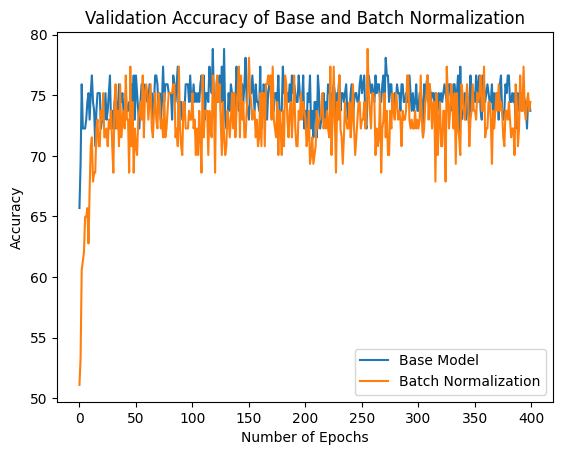

In [43]:
# Plotting the graph for validation accuracy for base and batch normalization
plt.plot(val_accuracy_s1, label='Base Model')
plt.plot(val_accuracy_bn, label='Batch Normalization')
plt.title('Validation Accuracy of Base and Batch Normalization')
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

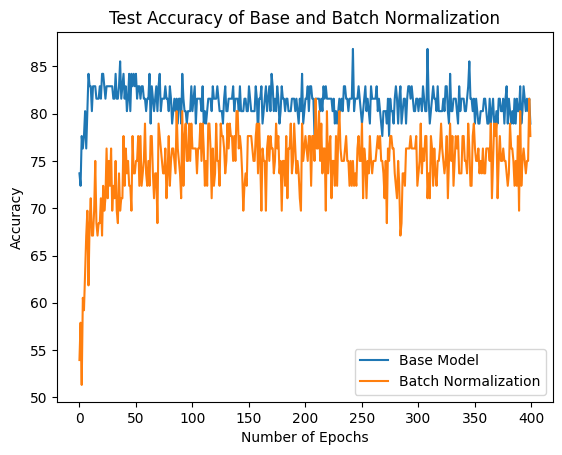

In [44]:
# Plotting the graph for test accuracy for base and batch normalization
plt.plot(test_accuracy_s1, label='Base Model')
plt.plot(test_accuracy_bn, label='Batch Normalization')
plt.title("Test Accuracy of Base and Batch Normalization")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

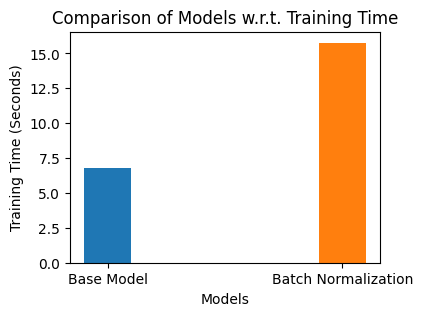

In [45]:
# Plotting the graph w.r.t. Training Time
fig = plt.figure(figsize = (4, 3))
plt.bar(['Base Model', 'Batch Normalization'], [train_time_base, train_time_batchnorm], color=['tab:blue', 'tab:orange'], width=0.2)
plt.xlabel('Models')
plt.ylabel('Training Time (Seconds)')
plt.title('Comparison of Models w.r.t. Training Time')
plt.show()

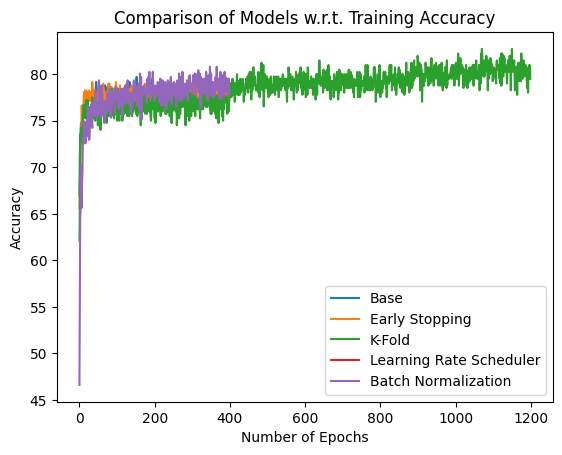

In [46]:
# Plotting the graph for test accuracy for all setup
plt.plot(train_accuracy_s1, label = "Base")
plt.plot(train_accuracy_early, label = "Early Stopping")
plt.plot(train_accuracy_kf, label = "K-Fold")
plt.plot(train_accuracy_ls, label = "Learning Rate Scheduler")
plt.plot(train_accuracy_bn, label = "Batch Normalization")
plt.title("Comparison of Models w.r.t. Training Accuracy")
plt.legend()
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.show()

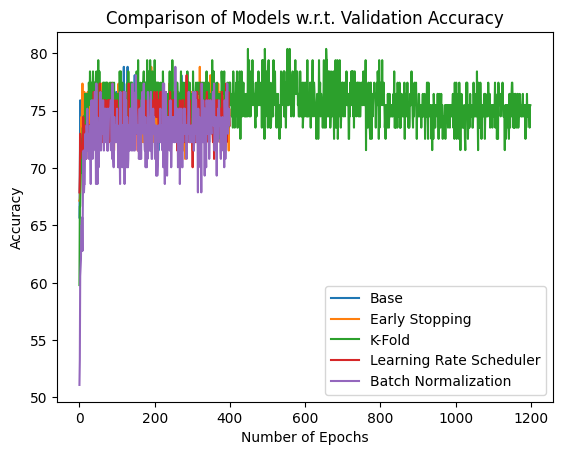

In [47]:
# Plotting the graph for test accuracy for all setup
plt.plot(val_accuracy_s1)
plt.plot(val_accuracy_early)
plt.plot(val_accuracy_kf)
plt.plot(val_accuracy_ls)
plt.plot(val_accuracy_bn)
plt.title("Comparison of Models w.r.t. Validation Accuracy")
plt.legend(['Base', 'Early Stopping', 'K-Fold', 'Learning Rate Scheduler', 'Batch Normalization'])
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.show()

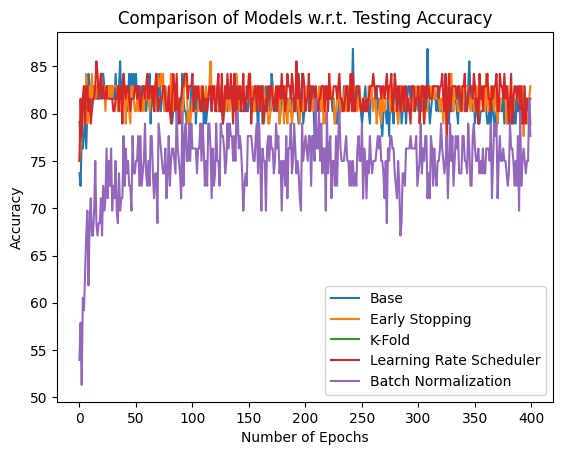

In [48]:
# Plotting the graph for test accuracy for all setup
plt.plot(test_accuracy_s1)
plt.plot(test_accuracy_early)
plt.plot(test_accuracy_kf)
plt.plot(test_accuracy_ls)
plt.plot(test_accuracy_bn)
plt.title("Comparison of Models w.r.t. Testing Accuracy")
plt.legend(['Base', 'Early Stopping', 'K-Fold', 'Learning Rate Scheduler', 'Batch Normalization'])
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.show()

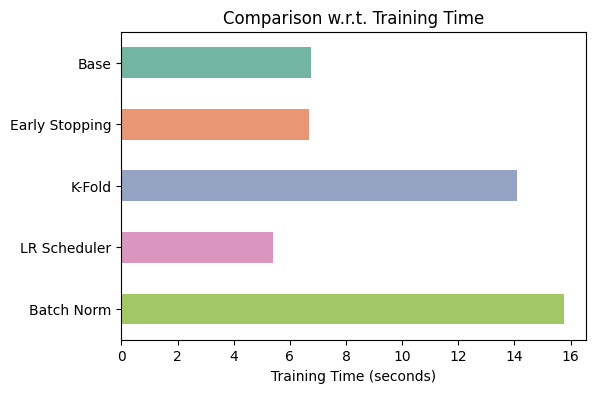

In [49]:
train_time = [train_time_base, train_time_earlystop, train_time_kfold, train_time_lsch, train_time_batchnorm]
labels = ['Base', 'Early Stopping','K-Fold', 'LR Scheduler', 'Batch Norm']

plt.figure(figsize=(6, 4))
plt.title('Comparison w.r.t. Training Time')
plt.xlabel('Training Time (seconds)')
sns.barplot(x=train_time, y=labels, width=0.5, palette = 'Set2')
plt.show()


In [51]:
# Saving all the models

model_data = {
    'base_model': base_model.state_dict(),
    'model_earlystopping': model_earlystop.state_dict(),
    'model_kfold': model_kfold.state_dict(),
    'model_learningratescheduler': model_lsch.state_dict(),
    'model_batchnorm': model_batchnorm.state_dict(),
}

torch.save(model_data, 'sejaldee_lokeshsu_assignment2_part2.h5')

### References
1. https://machinelearningmastery.com/manually-optimize-neural-networks/
2. https://medium.com/analytics-vidhya/early-stopping-with-pytorch-to-restrain-your-model-from-overfitting-dce6de4081c5
3. https://github.com/christianversloot/machine-learning-articles/blob/main/how-to-use-k-fold-cross-validation-with-pytorch.md
4. https://medium.com/dataseries/k-fold-cross-validation-with-pytorch-and-sklearn-d094aa00105f
5. https://www.kaggle.com/code/isbhargav/guide-to-pytorch-learning-rate-scheduling
6. https://pytorch.org/docs/stable/nn.html